<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction - Part 4**

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis with Visualizations
*   Preparing Data 
*   Feature Engineering

***


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#colors for graphs & charts
palette = ['#0ca3db', '#37c5ef', '#045788', '#5892a9', '#0b6f8d', '#2c4c5c']

## Functions

In [2]:
def plot_bar(df, col_x, col_y, title, sub, hue=None, orient='v'):
    #figure details
    fig = plt.figure(figsize=(10,8))
    
    #plot
    ax = sns.barplot(data=df, x=col_x, y=col_y, hue=hue, orient=orient, palette=palette)
    ax.axhline(y = 0, color = "black", linewidth = 8, alpha = .7)        
        
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')

    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.tick_params(labelsize=18)
    
    #title & subtitle
    ax.text(0.02, .94, s=title, fontsize=28, weight="bold", alpha=.75, transform=fig.transFigure)
    ax.text(0.02, .9, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
        
    #signature bar
    ax.text(x=0, y=-0.02,
            s=" ©NoahGampe" + ' '*95 + "Source: SpaceX Wikipedia ",
            fontsize=14, color="#f0f0f0", backgroundcolor="grey", transform=fig.transFigure)
    
    plt.show()
    
def plot_scatter(df, col_x, col_y, hue, title, sub):
    #figure details
    fig = plt.figure(figsize=(10,8))

    #plot
    ax = sns.scatterplot(data=df, x=col_x, y=col_y, hue=hue, s=70, alpha=0.8)
    
    #black line
    if df[col_y].dtype == 'object':
        ax.axvline(x = 0, color = "black", linewidth = 4, alpha = .7)
    else:
        ax.axhline(y = 0, color = "black", linewidth = 4, alpha = .7)
        
    ax.tick_params(labelsize=18)
    
    #legend
    handles, _ = ax.get_legend_handles_labels()
    labels = ['Failure', 'Success']
    ax.legend(handles, labels, frameon=False, loc=0)
    
    #title & subtitle
    ax.text(-0.03, .95, s=title, fontsize=28, weight="bold", alpha=.75, transform=fig.transFigure)
    ax.text(-0.03, .91, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
        
    #signature bar
    ax.text(x=-0.05, y=-0.04,
            s=" ©NoahGampe" + ' '*100 + "Source: SpaceX Wikipedia ",
            fontsize=14, color="#f0f0f0", backgroundcolor="grey", transform=fig.transFigure)
    
    plt.show()
    
def plot_strip(df, col_x, col_y, hue, title, sub):
    #figure details
    fig = plt.figure(figsize=(10,8))
    
    #plot
    ax = sns.stripplot(data=df, x=col_x, y=col_y, hue=hue, s=8, alpha=0.8)
    
    #black line
    if df[col_y].dtype == 'object':
        ax.axvline(x = 0, color = "black", linewidth = 4, alpha = .7)
    else:
        ax.axhline(y = 0, color = "black", linewidth = 4, alpha = .7)    
    
    ax.tick_params(labelsize=18)    
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    #legend
    handles, _ = ax.get_legend_handles_labels()
    labels = ['Failure', 'Success']
    ax.legend(handles, labels, frameon=False, loc=0)
    
    #title & subtitle
    ax.text(-.1, .94, s=title, fontsize=28, weight="bold", alpha=.75, transform=fig.transFigure)
    ax.text(-.1, .9, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
        
    #signature bar
    ax.text(x=-0.12, y=0.001,
            s=" ©NoahGampe" + ' '*106 + "Source: SpaceX Wikipedia ",
            fontsize=14, color="#f0f0f0", backgroundcolor="grey", transform=fig.transFigure)
    
    plt.show()
    
def plot_line(df, col_x, col_y, title, sub):
    #figure details
    fig = plt.figure(figsize=(10,8))
    
    #plot
    ax = sns.lineplot(data=df, x=col_x, y=col_y)
    ax.axhline(y = 0, color = "black", linewidth = 4, alpha = .7)        

    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.tick_params(labelsize=18)
    
    #title & subtitle
    ax.text(0.02, .94, s=title, fontsize=28, weight="bold", alpha=.75, transform=fig.transFigure)
    ax.text(0.02, .9, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
        
    #signature bar
    ax.text(x=0, y=-0.02,
            s=" ©NoahGampe" + ' '*95 + "Source: SpaceX Wikipedia ",
            fontsize=14, color="#f0f0f0", backgroundcolor="grey", transform=fig.transFigure)
    
    plt.show()

# Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and examine the first 5 rows.

In [3]:
df = pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Flight Number vs. Payload Mass

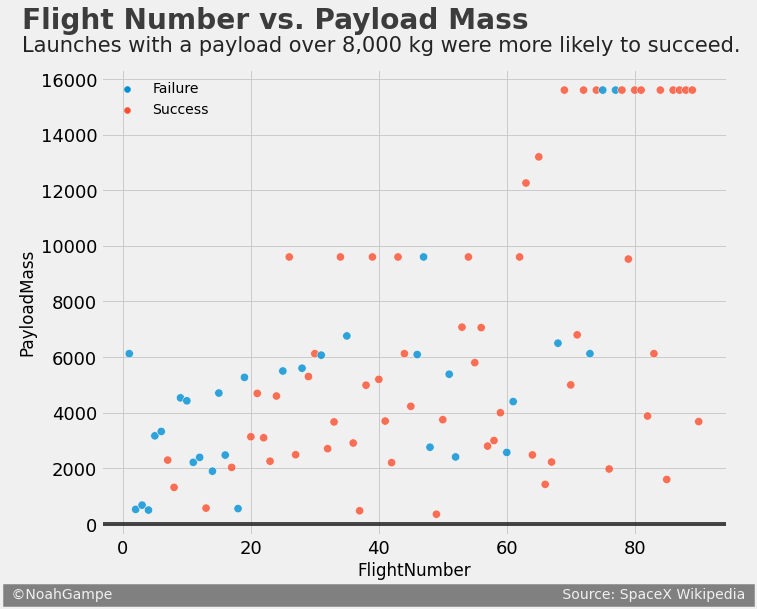

In [4]:
title = "Flight Number vs. Payload Mass"
sub = "Launches with a payload over 8,000 kg were more likely to succeed."
plot_scatter(df, 'FlightNumber', 'PayloadMass', 'Class', title, sub)

We can see that as the flight number increases, the first stage is more likely to land successfully. It also appears that the heavier the payload, the higher the chance of a successful landing. A majority of launches with an 8,000kg+ payload were successful.

## Flight Number vs. Launch Site

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [5]:
test = df.groupby(['LaunchSite'])
test.get_group

<bound method BaseGroupBy.get_group of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002B1849C1C30>>

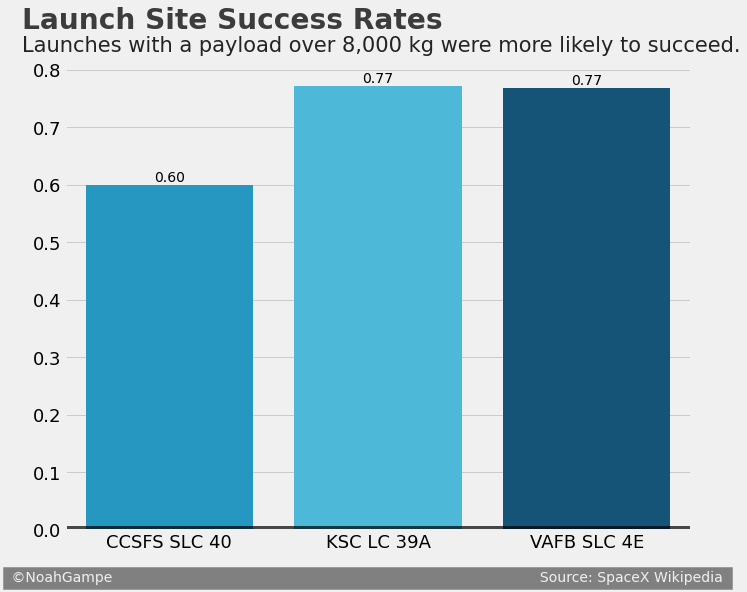

In [6]:
#gets df based on launch site
site = df.groupby(['LaunchSite']).mean()

title = "Launch Site Success Rates"
sub = "Launches with a payload over 8,000 kg were more likely to succeed."
plot_bar(site, site.index, 'Class', title, sub)

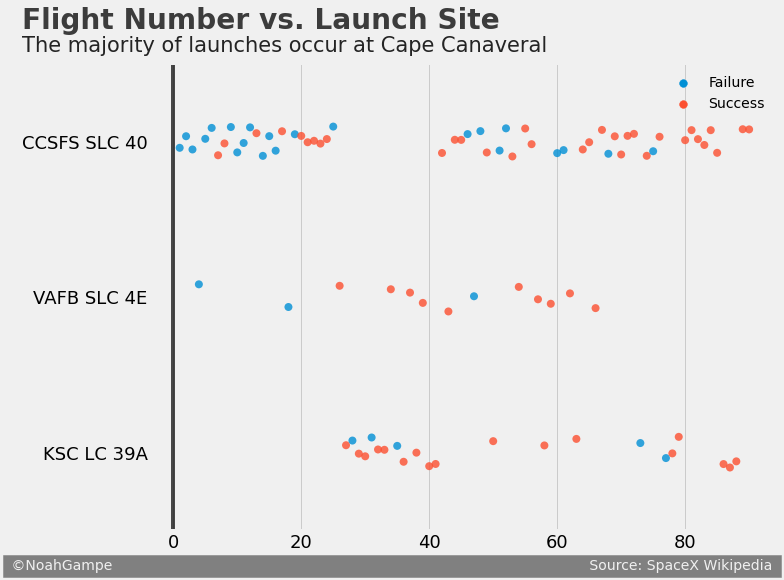

In [7]:
title = "Flight Number vs. Launch Site"
sub = "The majority of launches occur at Cape Canaveral"
plot_strip(df, 'FlightNumber', 'LaunchSite', 'Class', title, sub)

We can see that Cape Canaveral (CCSFS SLC 40) has the most launches overall with 55, but compared to the other two sites, it has the lowest overall success rate with only 60%.

## Launch Site vs. Payload Mass

We also want to observe if there is any relationship between launch sites and their payload mass.

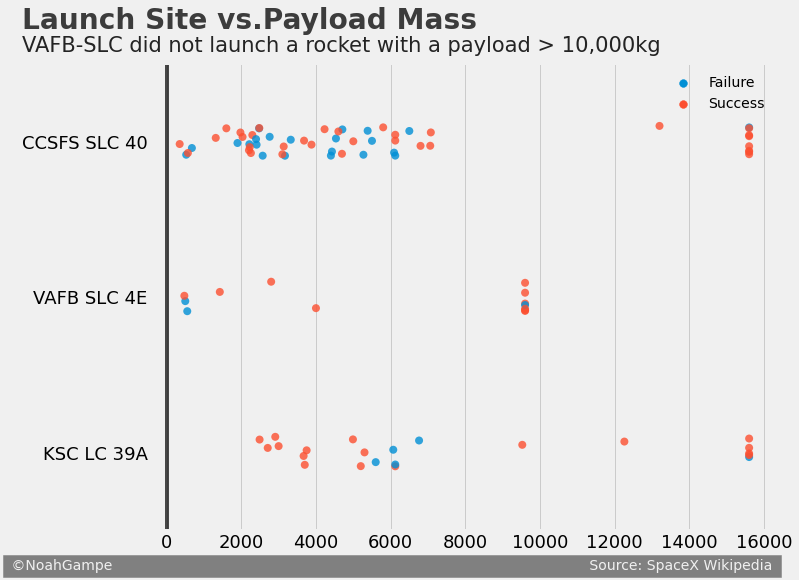

In [8]:
title = "Launch Site vs.Payload Mass"
sub = "VAFB-SLC did not launch a rocket with a payload > 10,000kg"
plot_strip(df, 'PayloadMass', 'LaunchSite', 'Class', title, sub)

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [9]:
# df.groupby(['Orbit'])['Class'].mean() #only gets mean of Class column
orbit_df = df.groupby(['Orbit']).mean()
orbit_df

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
GEO,83.000000,6123.547647,2.000000,1.000000,1.000000,1.000000,5.000000,12.000000,-80.577366,28.561857,1.000000
GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,1.111111,-80.586229,28.577258,0.518519
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,2.285714,-80.583697,28.572857,0.619048
LEO,20.000000,3890.806134,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,6.333333,-80.577366,28.561857,0.666667
PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,2.000000,-120.610829,34.632093,0.666667
SO,73.000000,6123.547647,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000


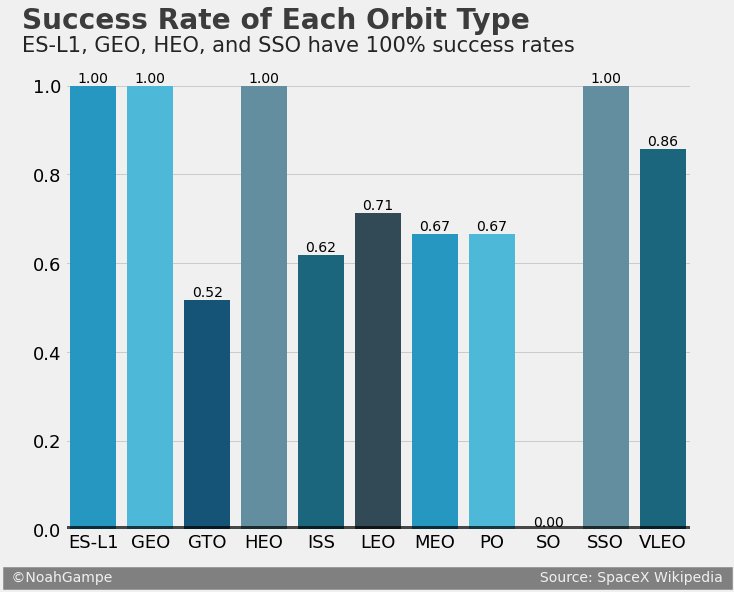

In [10]:
title = "Success Rate of Each Orbit Type"
sub = "ES-L1, GEO, HEO, and SSO have 100% success rates"
plot_bar(orbit_df, orbit_df.index, 'Class', title, sub)

We can see that `SO` (Sun Orbit) has a 0% success rate, though there was only one launch within that category. We can also see that `SSO` (Sun-Synchronous Orbit) has a 100% success rate, even though the two are closely related (if not the exact same). I haven't been able to find any information regarding this, but it is something to take into account.

The orbit types with the perfect success rates are the following:

* [ES-L1](https://en.wikipedia.org/wiki/Lagrange_point) - At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth
* [GEO](https://en.wikipedia.org/wiki/Geostationary_orbit) - Circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation
* [HEO](https://en.wikipedia.org/wiki/Highly_elliptical_orbit) - A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth
* [SSO](https://en.wikipedia.org/wiki/Sun-synchronous_orbit) - Sun-synchronous orbit, a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time

## Flight Number vs. Orbit Type

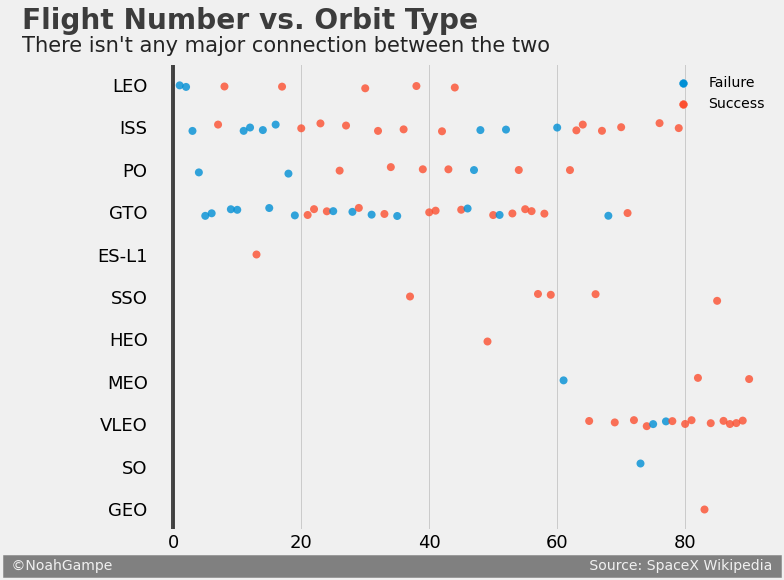

In [11]:
title = "Flight Number vs. Orbit Type"
sub = "There isn't any major connection between the two"
plot_strip(df, 'FlightNumber', 'Orbit', 'Class', title, sub)

## Payload Mass vs. Orbit Type

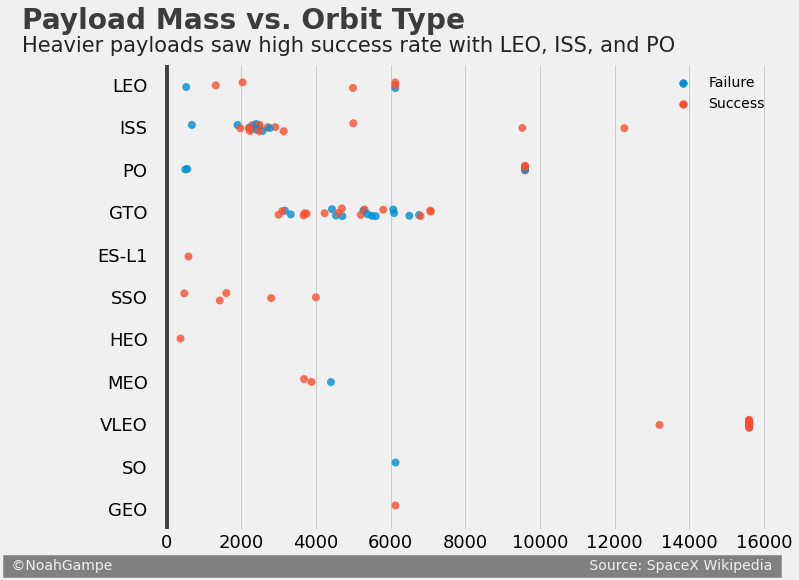

In [12]:
title = "Payload Mass vs. Orbit Type"
sub = "Heavier payloads saw high success rate with LEO, ISS, and PO"
plot_strip(df, 'PayloadMass', 'Orbit', 'Class', title, sub)

However, with the GTO orbit type, it's unclear or difficult to say if the payload affects the success rate, since there is a decent number of success and failures throughout the range of payloads.

## Yearly Trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [13]:
#convert Date to datetime object
df['Date']= pd.to_datetime(df['Date'])

year_df = df.groupby(df['Date'].dt.year).mean()

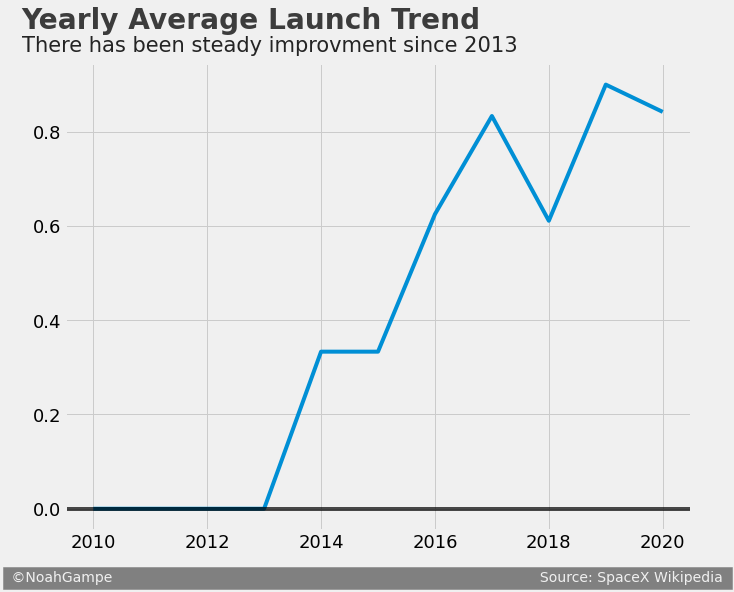

In [14]:
title = "Yearly Average Launch Trend"
sub = "There has been steady improvment since 2013"
plot_line(year_df, year_df.index, 'Class', title, sub)

# Feature Engineering

By now, we can see that there are some features that do have an impact on the outcome of a launch. We will gather these features and create a new dataframe using only them, which will greatly improve our model's chances of making a correct prediction later on.

In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
               'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## One-Hot Encoding Categorical Columns

We can use the [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) pandas method and `features` dataframe to apply One-Hot Encoding to the categorical columns `Orbits`, `LaunchSite`, `LandingPad`, and `Serial`. 

In [16]:
cat_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=cat_columns)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Casting Numeric Columns

Now that our `features_one_hot` dataframe only contains numbers, we can cast the entire dataframe to the variable type `float64`.

In [17]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section.

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)